Optimised a step...
Optimised a step...
Optimised a step...
[1 7] : 1.2239999999999465
[2 8] : 1.2239999999999465
[3 8] : 1.000000000000098
[5 1] : 1.015999999998539
[ 6 -1] : 1.6879999999980846
[7 3] : 1.015999999998539


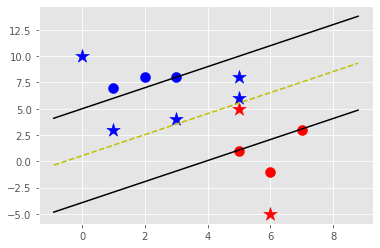

In [23]:
#Creating Support Vector Machine from scratch
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')


class Support_Vector_Machine:
  def __init__(self, visualisation = True):
    self.visualisation = visualisation
    self.colors = {1:'r' , -1:'b'}
    if self.visualisation:
      self.fig = plt.figure()  #The figure to the whole window
      self.ax = self.fig.add_subplot(1,1,1) #The 1x1 subplot number 1(In case there are multiple)

  def fit(self, data): #Function for training
    self.data = data
    # {||w|| : [w,b]}
    opt_dict = {}
    transforms = [[1,1],
                  [-1,1],
                  [-1,-1],
                  [1,-1]]

    all_data = []
    for yi in self.data:
      for featureset in self.data[yi]:
        for feature in featureset:
          all_data.append(feature)

    self.max_feature_value = max(all_data)
    self.min_feature_value = min(all_data)
    all_data = None

    step_sizes= [self.max_feature_value * 0.1,
                 self.max_feature_value * 0.01,
                 self.max_feature_value * 0.001] #Keep expense vs accuracy vs speed in mind
    
    b_range_multiple = 5 #very expensive
    #Do not need small steps in b as compared to w
    b_multiple = 5

    latest_optimum = self.max_feature_value*10 #First element in vectow w

    for step in step_sizes:
      w = np.array([latest_optimum,latest_optimum])
      optimized = False #We can do this because of convex 
      while not optimized:
        for b in np.arange(-1*(self.max_feature_value * b_range_multiple),
                           (self.max_feature_value * b_range_multiple) , step*b_multiple ):
          for transformation in transforms:
            w_t = w*transformation
            found_option = True #Weakest link in SVM vvv

            for  i in self.data:
              for xi in self.data[i]:
                yi = i
                if not yi*(w_t@xi + b) >=1:  # Since the function is yi(wt.xi + b)>=1
                  found_option = False
                #print(xi, yi*(w_t@xi + b))
            if found_option:
              opt_dict[np.linalg.norm(w_t)] = [w_t , b]
        
        if w[0] < 0:
          optimized = True
          print("Optimised a step...")
        else:
          # w = [5,5]
          # step =1
          #VVV = [4,4]
          w = w-step
      norms = sorted([n for n in opt_dict])
      opt_choice = opt_dict[norms[0]]

      #||w|| : [w,b]
      self.w= opt_choice[0]  
      self.b= opt_choice[1]
      latest_optimum = opt_choice[0][0] + step*2

    
    for  i in self.data:
      for xi in self.data[i]:
        yi = i
        #if not yi*(self.w@xi + self.b) >=1:  # Since the function is yi(wt.xi + b)>=1
          #found_option = False
        print(xi, ":", yi*(self.w@xi + self.b))
  def predict(self, features):
    # sign( x.w + b)
    classification = np.sign( (np.array(features) @ self.w)  + self.b)
    if classification !=0 and self.visualisation:
      self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])

    return classification

  def visualise(self):
    [[self.ax.scatter(x[0], x[1], s=100, color= self.colors[i]) for x in data_dict[i]] for i in data_dict]

    # hyperplane = x.w + b
    # v = x.w + b
    # positive support vector = 1
    # negative support vector = -1
    # decision boundary = 0

    def hyperplane(x,w,b,v):
      return (-w[0]*x - b+v) / w[1]

    datarange = (self.min_feature_value*0.9 , self.max_feature_value*1.1)
    hyp_x_min = datarange[0]
    hyp_x_max = datarange[1]

    # x.w + b=1
    # positive support vector = 1
    psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
    psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
    self.ax.plot([hyp_x_min,hyp_x_max], [psv1,psv2], 'k')

    # x.w + b=1
    # negative support vector =-1
    nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
    nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
    self.ax.plot([hyp_x_min,hyp_x_max], [nsv1,nsv2], 'k')

    # x.w + b=0
    # positive support vector = 1
    db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
    db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
    self.ax.plot([hyp_x_min,hyp_x_max], [db1,db2], 'y--')

    plt.show()

data_dict = {-1: np.array([[1,7],
                          [2,8],
                          [3,8]] ) ,
             
              1: np.array([[5,1], 
                          [6,-1], 
                          [7,3]] )} 


svm = Support_Vector_Machine()
svm.fit(data = data_dict)

predict_us = [[0,10],
              [1,3],
              [3,4],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]
for p in predict_us:
  svm.predict(p)


svm.visualise()

In [25]:
svm.predict([4,7]), svm.predict([5,2])

(-1.0, 1.0)